<a href="https://colab.research.google.com/github/SajalDasShovon/ML-Approach/blob/main/Result_Prediction_with_DT_%26_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import  confusion_matrix
from matplotlib import pyplot as plt
from sklearn import tree

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Result Prediction Dataset.csv", encoding='utf8', engine='python')

In [ ]:
dataset.head()

,Daily Study Hour (0 - ),Average CT Marks (0 - 20),Class Attendance (percentage),PL/SPL Study Hours (Daily) (0 - ),PL/SPL Sleeping Hours (Daily Average),Average Sleeping Hours (Daily),Social Media Hours (Daily Average),PL/SPL Social Media Hours (Daily Average),Concentration in Classes (0 - 10),Confidence (0 - 10),GPA
0,1,8,65,12,6,8.0,3,1,NaN,3,3.25
1,2,12,95,9,10,10.0,2,1,7.0,7,3.84
2,2,15,96,13,6,8.0,5,2,5.0,8,3.61
3,1,9,70,6,8,8.0,3,2,7.0,9,3.41
4,1,8,60,10,9,8.0,2,2,3.0,4,3.14


In [ ]:
dataset = dataset.rename(columns={'Daily Study Hour (0 - )':'DailyStudyHour', 'Average CT Marks (0 - 20)':'AvgCTMarks', 'Class Attendance (percentage)':'ClsAttnPer', 'PL/SPL Study Hours (Daily) (0 - )':'PL_SPLStudyHours', 'PL/SPL Sleeping Hours (Daily Average)':'PL_SPLSleepingHours', 'Average Sleeping Hours (Daily)':'AvgSleepingHours', 'Social Media Hours (Daily Average)':'SocialMediaHours', 'PL/SPL Social Media Hours (Daily Average)':'PL_SPLSocialMediaHours', 'Concentration in Classes (0 - 10)':'ConcenInCls', 'Confidence (0 - 10)':'Confidence', 'Final Grade (last Semester - 3-2) (GPA) ':'FinalGrade'})
dataset.head()

,DailyStudyHour,AvgCTMarks,ClsAttnPer,PL_SPLStudyHours,PL_SPLSleepingHours,AvgSleepingHours,SocialMediaHours,PL_SPLSocialMediaHours,ConcenInCls,Confidence,GPA
0,1,8,65,12,6,8.0,3,1,NaN,3,3.25
1,2,12,95,9,10,10.0,2,1,7.0,7,3.84
2,2,15,96,13,6,8.0,5,2,5.0,8,3.61
3,1,9,70,6,8,8.0,3,2,7.0,9,3.41
4,1,8,60,10,9,8.0,2,2,3.0,4,3.14


In [ ]:
dataset['ConcenInCls'][0] = 5
dataset.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,DailyStudyHour,AvgCTMarks,ClsAttnPer,PL_SPLStudyHours,PL_SPLSleepingHours,AvgSleepingHours,SocialMediaHours,PL_SPLSocialMediaHours,ConcenInCls,Confidence,GPA
0,1,8,65,12,6,8.0,3,1,5.0,3,3.25
1,2,12,95,9,10,10.0,2,1,7.0,7,3.84
2,2,15,96,13,6,8.0,5,2,5.0,8,3.61
3,1,9,70,6,8,8.0,3,2,7.0,9,3.41
4,1,8,60,10,9,8.0,2,2,3.0,4,3.14


In [ ]:
dataset['GPA'].head()

0    3.25
1    3.84
2    3.61
3    3.41
4    3.14
Name: GPA, dtype: float64

In [ ]:
len = dataset['GPA'].shape[0]
for i in range(len):
  if (dataset['GPA'][i] >= 3.0 and dataset['GPA'][i] < 3.50):
    dataset['GPA'][i] = 1
  elif (dataset['GPA'][i] >= 3.50 and dataset['GPA'][i] < 3.75):
    dataset['GPA'][i] = 2
  elif (dataset['GPA'][i] >= 3.75 and dataset['GPA'][i] <= 4.0):
    dataset['GPA'][i] = 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
import math 
for i in range(len):
  dataset['GPA'][i] = int(dataset['GPA'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
dataset['GPA']

0     1.0
1     3.0
2     2.0
3     1.0
4     1.0
     ... 
83    3.0
84    1.0
85    3.0
86    3.0
87    1.0
Name: GPA, Length: 88, dtype: float64

In [ ]:
feature_cols = ['DailyStudyHour', 'AvgCTMarks', 'ClsAttnPer', 'PL_SPLStudyHours', 'PL_SPLSleepingHours', 'AvgSleepingHours', 'SocialMediaHours', 'PL_SPLSocialMediaHours', 'ConcenInCls', 'Confidence']
X = dataset[feature_cols]
Y = dataset.GPA

In [ ]:
# Split dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
#KNN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Create KNN object
knn = KNeighborsClassifier(n_neighbors=10)

# Train KNN
knn = knn.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [ ]:
y_pred[:5]

array([3., 1., 3., 3., 3.])

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(Y_test, y_pred))

Accuracy: 0.6666666666666666


In [ ]:
cm_knn = np.array(confusion_matrix(Y_test, y_pred))
cm_knn

array([[6, 0, 1],
       [1, 0, 2],
       [1, 1, 6]])

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 70):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))
    print(np.mean(pred_i != Y_test))

0.5
0.5555555555555556
0.5555555555555556
0.6111111111111112
0.4444444444444444
0.4444444444444444
0.3888888888888889
0.4444444444444444
0.3888888888888889
0.3333333333333333
0.3888888888888889
0.3888888888888889
0.3333333333333333
0.3333333333333333
0.3888888888888889
0.4444444444444444
0.4444444444444444
0.4444444444444444
0.4444444444444444
0.5
0.3888888888888889
0.4444444444444444
0.4444444444444444
0.4444444444444444
0.4444444444444444
0.5
0.3888888888888889
0.4444444444444444
0.4444444444444444
0.4444444444444444
0.5
0.4444444444444444
0.5
0.5
0.5
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.5

Text(0, 0.5, 'Mean Error')

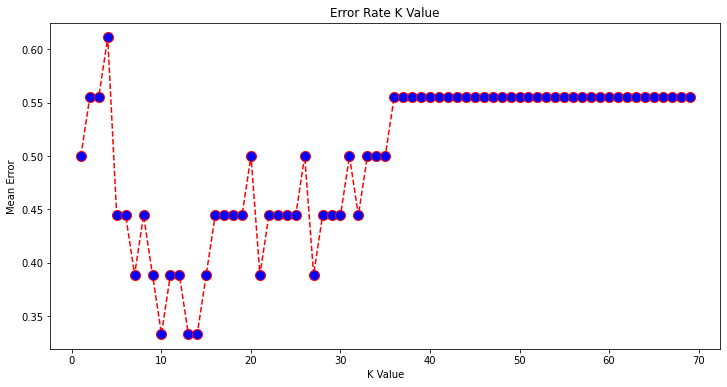

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 70), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
#ENSEMBLE

knn1 = KNeighborsClassifier(n_neighbors=10)
knn1 = knn1.fit(X_train, Y_train)

knn2 = KNeighborsClassifier(n_neighbors=14)
knn2 = knn2.fit(X_train, Y_train)

knn3 = KNeighborsClassifier(n_neighbors=13)
knn3 = knn3.fit(X_train, Y_train)

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

esetimator = [('knn1', knn1), ('knn2', knn2), ('knn3', knn3)]

esnml_model = StackingClassifier(estimators=esetimator, final_estimator=LogisticRegression())

esnml_model.fit(X_train, Y_train)

StackingClassifier(estimators=[('knn1', KNeighborsClassifier(n_neighbors=10)),
                               ('knn2', KNeighborsClassifier(n_neighbors=14)),
                               ('knn3', KNeighborsClassifier(n_neighbors=13))],
                   final_estimator=LogisticRegression())

In [ ]:
y_pred_ens = esnml_model.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, y_pred))

Accuracy: 0.6666666666666666


In [ ]:
cm_knn_ens = np.array(confusion_matrix(Y_test, y_pred))
cm_knn_ens

array([[6, 0, 1],
       [1, 0, 2],
       [1, 1, 6]])

In [ ]:
#Decision Tree
# Create Decision Tree object

DT = DecisionTreeClassifier(criterion='entropy',
                            random_state=1, splitter='best',
                            class_weight ='balanced')

# Train Decision Tree
DT = DT.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred_dt = DT.predict(X_test)

NameError: ignored

In [ ]:
print("Accuracy:", accuracy_score(Y_test, y_pred_dt))

Accuracy: 0.6111111111111112


In [ ]:
y_pred_dt[:5]

array([3., 1., 3., 3., 2.])

In [ ]:
cm_dt = np.array(confusion_matrix(Y_test, y_pred_dt))
cm_dt

array([[5, 1, 1],
       [0, 2, 1],
       [1, 3, 4]])

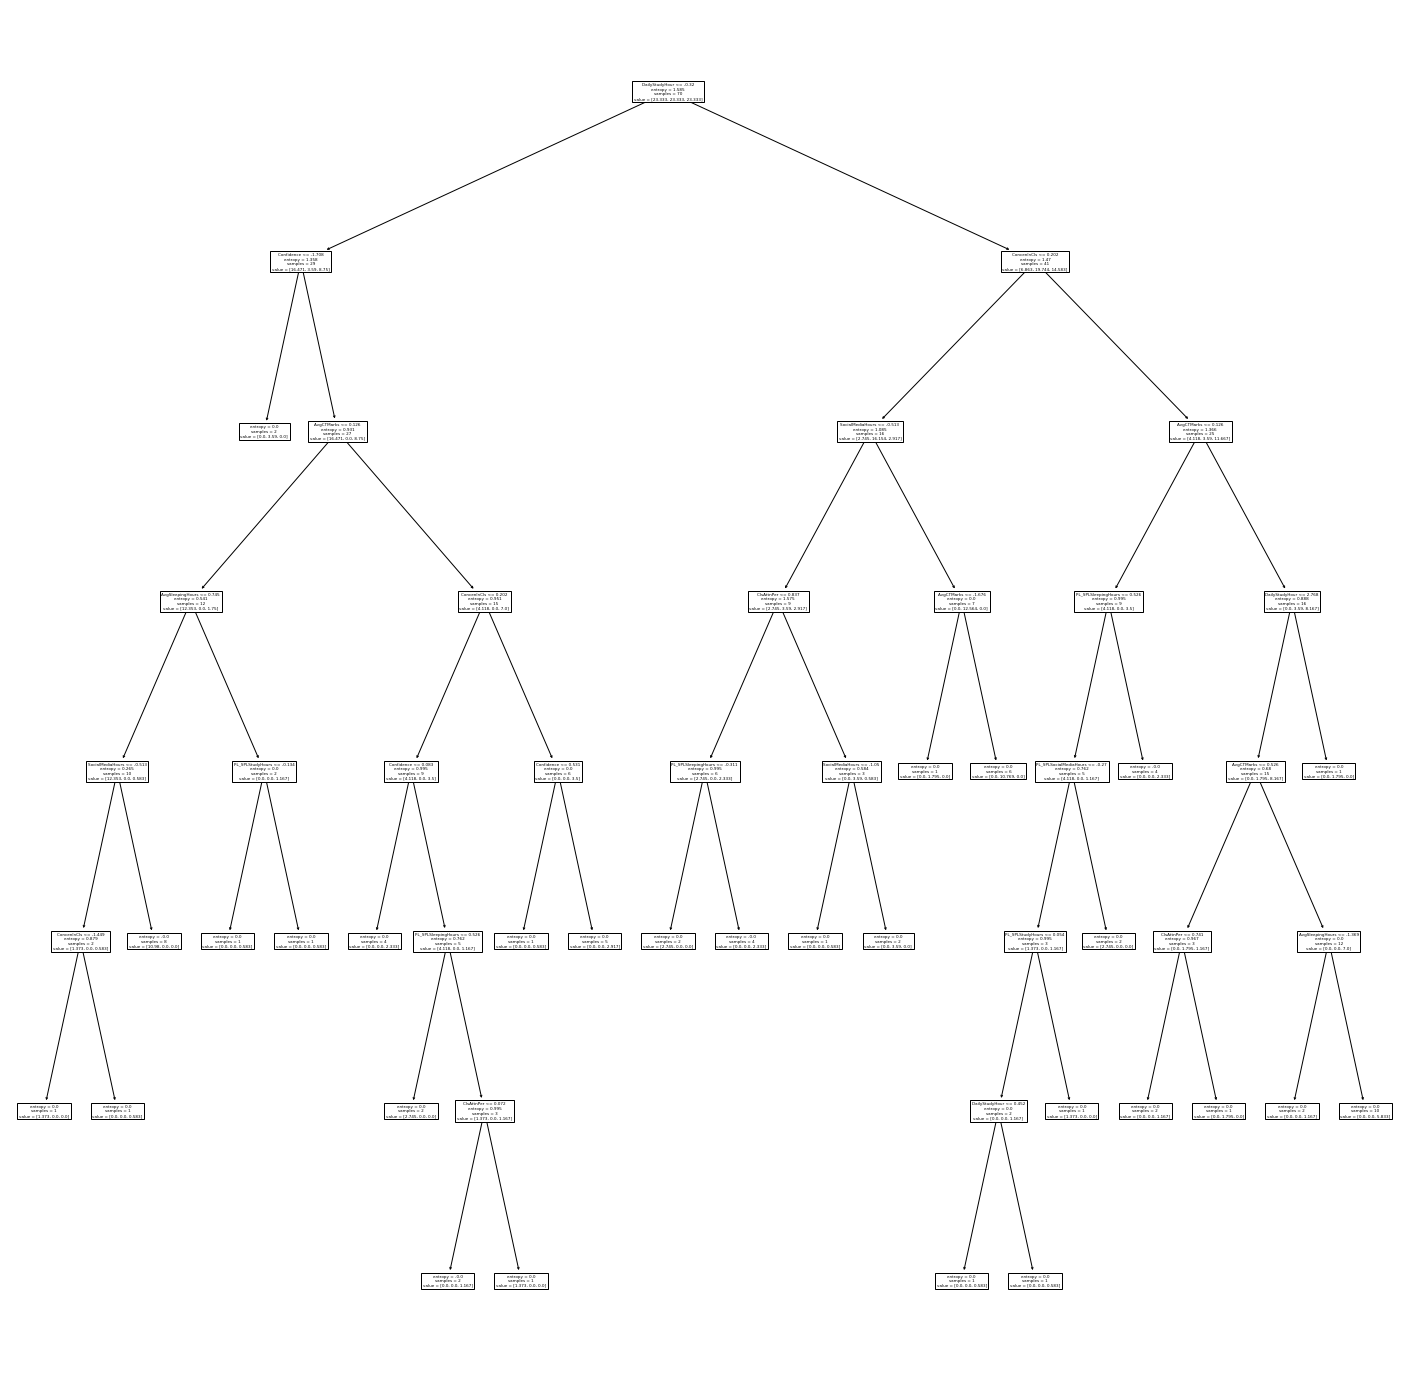

In [ ]:
fig, ax = plt.subplots(figsize=(25, 25))
tree.plot_tree(DT,ax=ax,feature_names=['DailyStudyHour', 'AvgCTMarks', 'ClsAttnPer', 'PL_SPLStudyHours', 'PL_SPLSleepingHours', 'AvgSleepingHours', 'SocialMediaHours', 'PL_SPLSocialMediaHours', 'ConcenInCls', 'Confidence'])
plt.show()

In [ ]:
# Decision Tree Classifier 
#parameter tuning
dt = DecisionTreeClassifier()

NameError: ignored